<a href="https://colab.research.google.com/github/tushar2k/Sem-V-labs/blob/master/AI%20ML-%20ECSE303L/AI_lab2_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simple Linear Regression
Linear regression is among the simplest regression methods. One of the main advantages of using it is ease of interpreting results. Simple linear regression is special case of regression where target feature is dependent on single variable, and then we find the best fitting line.<br>

##### y = m*x + c <br>

#### Dataset
The dataset is available at __"data/simple_linear_data.csv"__ in the respective challenge's repo.<br><br>
This is the modified version of the dataset 'Student Performance' provided by UCI Machine Learning repository.<br>
Original dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

#### Features (X)
- G2 - second year math grades (numeric: from 0 to 100)

#### Target (y)
- G3 - third year math grades (numeric: from 0 to 100, output target)

#### Objective
To gain understanding of single linear regression through implementing the model from scratch

#### Tasks
- Read the data from above mentioned dataset and define X and y as numpy array
- Add column at position 0 with all values=1 (pandas.DataFrame.insert function)
- Print rows from 40 to 55.
- Print the shape and datatype of both X and y
- Follow code cells to implement simple linear regression from scratch
    - Write hypothesis function to predict values
    - Write function for calculating mean_squared_error
    - Write function to return gradients for given weights
    - Perform gradient descent taking help of above functions

#### Further Fun (will not be evaluated
- Remove outliers, train again and see the difference in error.
```python
# Add this line before defining X and y
data = data[(data['G3']!=0)|((data['G2']==0)&(data['G3']==0))]
```
- Replace "*weights = np.random.rand(2)*" line in gradient descent with below line, train again and visualize results.
```python
# Replace above line with following in gradient descent function
weights = np.zeros(2,)
```
- Play with learning rate and max_iterations
- Generalize the code for multivariate(multiple) linear regression

#### Resources
- Linear regression maths: https://www.youtube.com/watch?v=ZkjP5RJLQF4
- Simple linear regression: https://www.youtube.com/watch?v=iAgYLRy7e20
- Tutorial: https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read the data from provided dir
data = pd.read_csv('https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/simple_linear_data.csv')

In [ ]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
data.insert(0,'one',1)

In [ ]:
# Print the dataframe rows
data

,one,G2,G3
0,1,30,30
1,1,25,30
2,1,40,50
3,1,70,75
4,1,50,50
...,...,...,...
390,1,45,45
391,1,80,80
392,1,40,35
393,1,60,50


In [ ]:
# Define X (input features) and y (output feature) 
data = data[(data['G3']!=0)|((data['G2']==0)&(data['G3']==0))]
X = data[['one','G2']].to_numpy()
y = data['G3'].to_numpy()

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(370, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(370,)


__Expected output__:<br><br>
X: Type-<class 'numpy.ndarray'>, Shape-(395,2)<br>
y: Type-<class 'numpy.ndarray'>, Shape-(395,)

Let us visualize the relationship between X and y

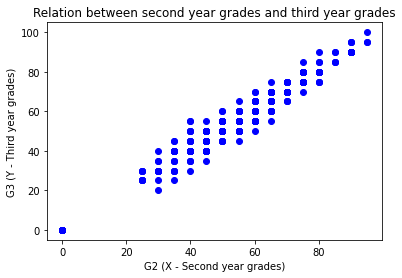

In [ ]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],y,c='b')
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [ ]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    y_pred = weights[1]*X[:,1]+weights[0]
    ### END CODE HERE ###
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [ ]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    mean_error=(np.sum((y_true-y_pred)**2))/len(y_true)
    return ((mean_error))
    ### END CODE HERE ###

In [ ]:
def gradient(X, y_true, y_pred):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    
    grad[0] = (-1/len(y))*(np.sum(y_true-y_pred))
    grad[1] = (-1/len(y))*(np.sum(X[:,1]*(y_true-y_pred)))
    
    ### END CODE HERE ###
    
    return grad

In [ ]:
def gradient_descent(X, y, learning_rate=0.00005, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.zeros(2,)
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###
    for _ in range (max_iterations):
        y_pred=predict(X,weights)
        losses.append(mean_squared_error(y, y_pred))
        w=gradient(X, y, y_pred)
        weights[0]-=learning_rate*w[0]
        weights[1]-=learning_rate*w[1]
    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [ ]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X, y)

In [ ]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 17.080759213669424


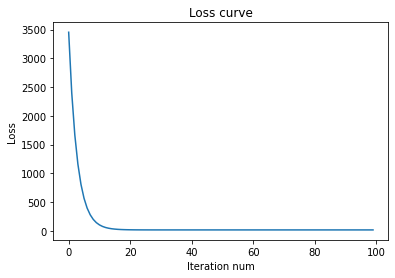

In [ ]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Make predictions using trained weights
y_pred = predict(X, optimal_weights)

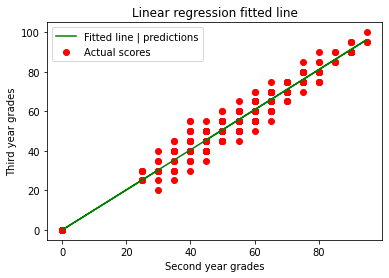

In [ ]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()